### Projeto 1: Regressão Linear Simples (Baseline)
* Tema: Previsão de Custos Médicos.
* Dataset Sugerido: Medical Cost Personal Datasets (Kaggle).
* Desafio: Prever o custo do seguro médico de uma pessoa com base em idade, IMC e hábitos.
* Conceitos-Chave: Correlação, p-valor, interpretação de coeficientes, erro quadrático (RMSE).

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### correlação numérica - pearson

In [4]:
numeric_cols = ["age", "bmi", "children", "charges"]
df[numeric_cols].corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### correlação com *smoker*

In [25]:
df["smoker_yes"] = (df["smoker"] == "yes").astype(int)
df["smoker_no"] = (df["smoker"] == "no").astype(int)
df[["charges", "age", "bmi", "smoker_yes", "smoker_no"]].corr()

,charges,age,bmi,smoker_yes,smoker_no
charges,1.000000,0.299008,0.198341,0.787251,-0.787251
age,0.299008,1.000000,0.109272,-0.025019,0.025019
bmi,0.198341,0.109272,1.000000,0.003750,-0.003750
smoker_yes,0.787251,-0.025019,0.003750,1.000000,-1.000000
smoker_no,-0.787251,0.025019,-0.003750,-1.000000,1.000000


In [6]:
df.duplicated().sum()
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,smoker_yes
581,19,male,30.59,0,no,northwest,1639.5631,0


In [7]:
df[["age", "bmi", "children", "charges"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.query("bmi <= 0 or age <= 0 or charges <= 0")

,age,sex,bmi,children,smoker,region,charges,smoker_yes


### análise da target

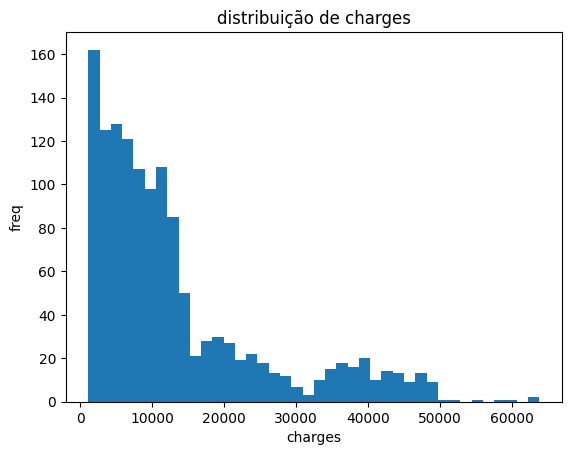

In [20]:
plt.figure()
plt.hist(df["charges"], bins=40)
plt.title("distribuição de charges")
plt.xlabel("charges")
plt.ylabel("freq")
plt.show()

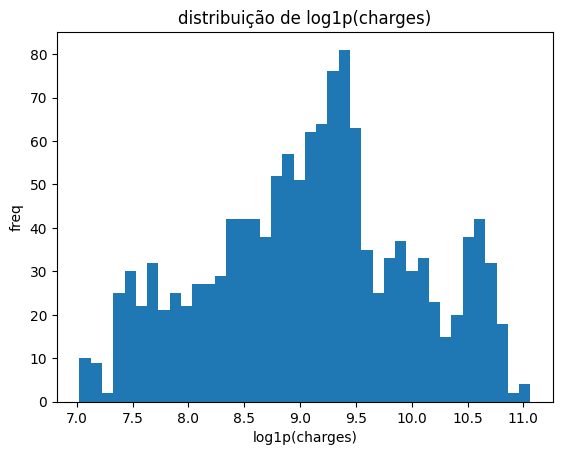

In [21]:
# log do dataset
plt.figure()
plt.hist(np.log1p(df["charges"]), bins=40)
plt.title("distribuição de log1p(charges)")
plt.xlabel("log1p(charges)")
plt.ylabel("freq")
plt.show()

### relação de features numéricas com charges

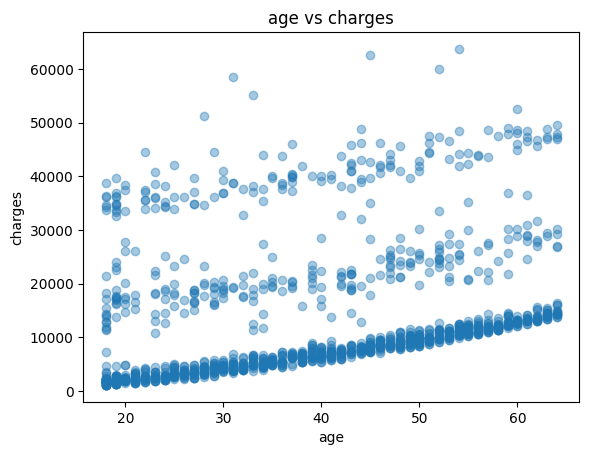

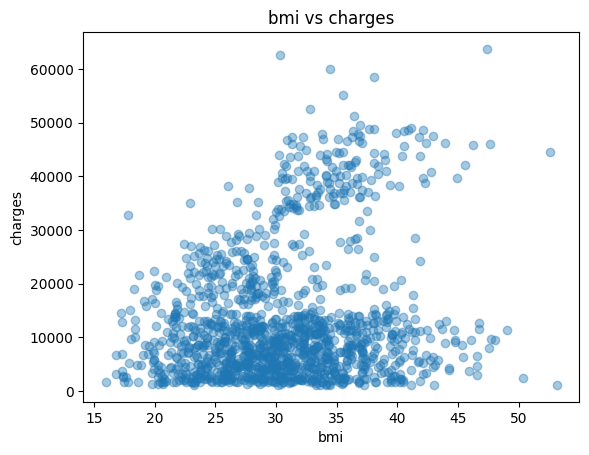

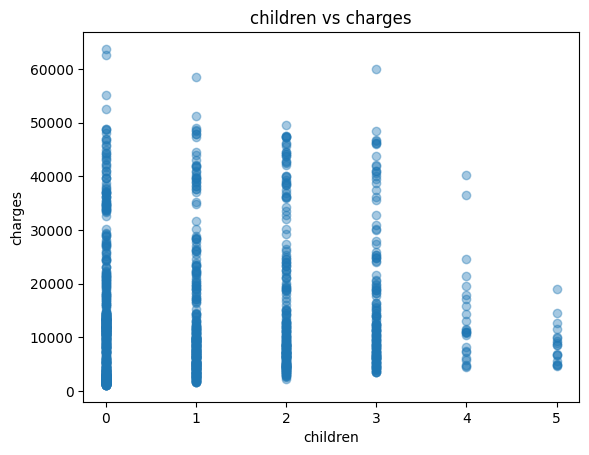

In [26]:
for col in ["age", "bmi", "children"]:
    plt.figure()
    plt.scatter(df[col], df["charges"], alpha=0.4)
    plt.title(f"{col} vs charges")
    plt.xlabel(col)
    plt.ylabel("charges")
    plt.show()

### grupos por smoker

<Figure size 640x480 with 0 Axes>

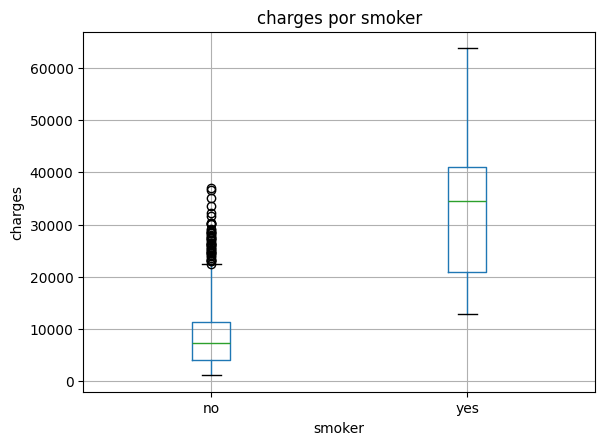

In [28]:
plt.figure()
df.boxplot(column="charges", by="smoker")
plt.title("charges por smoker")
plt.suptitle("")
plt.xlabel("smoker")
plt.ylabel("charges")
plt.show()

ser fumante está fortemente associado a custos maiores, variável importante para prever gastos